# Assignment 3 - Canny Edge Detection
## Mohammed Aadil - IIT2018179

------

### 1) [Noise reduction](#Noise-reduction)
### 2) [Gradient calculation](#Gradient-calculation)
### 3) [Non-maximum suppression](#Non-maximum-suppression)
### 4) [Double threshold](#Double-threshold)
### 5) [Edge Tracking by Hysteresis](#Edge-Tracking-by-Hysteresis)

------

### Including the required libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy.ndimage.filters import convolve

In [2]:
!wget "https://c1.wallpaperflare.com/preview/940/669/86/dove-pigeon-bird-animal.jpg"

--2021-02-17 15:58:34--  https://c1.wallpaperflare.com/preview/940/669/86/dove-pigeon-bird-animal.jpg
Resolving c1.wallpaperflare.com (c1.wallpaperflare.com)... 2606:4700:3035::ac43:a987, 2606:4700:3034::6815:2ef5, 172.67.169.135, ...
Connecting to c1.wallpaperflare.com (c1.wallpaperflare.com)|2606:4700:3035::ac43:a987|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54433 (53K) [image/jpeg]
Saving to: ‘dove-pigeon-bird-animal.jpg.1’

dove-pigeon-bird-an 100%[===================>]  53.16K  84.5KB/s    in 0.6s    

2021-02-17 15:58:37 (84.5 KB/s) - ‘dove-pigeon-bird-animal.jpg.1’ saved [54433/54433]



In [2]:
img = np.array([[50, 50, 50, 50, 50],
                [50, 50, 50, 100, 100],
                [50, 100, 100, 100, 100],
                [100, 100, 100, 100, 100],
                [100, 100, 100, 100, 100]], dtype=np.uint8)

In [3]:
def plot_images(img1, img2):
    plt.figure(figsize=(12,12))

    plt.subplot(1,2,1)
    plt.imshow(img1, cmap='gray')

    plt.subplot(1,2,2)
    plt.imshow(img2, cmap='gray')

    plt.show()

### Noise reduction

In [45]:
def gaussian_kernel(size, sigma=1):
    '''
        params:
            size : (int) size of the structuring element
            sigma : (float) 
            
        return:
            g : (2D matrix) gaussian kernel
    '''
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    
    normal = 1 / (2.0 * np.pi * (sigma**2)) 
    
    g =  np.exp(-((x**2 + y**2) / (2.0*(sigma**2)))) * normal
    
    return g

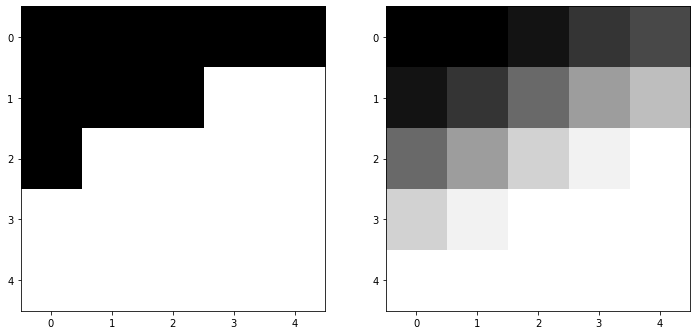

In [58]:
gausian_filter = gaussian_kernel(3, 1)
gaussian_blured = convolve(img, gausian_filter)

plot_images(img, gaussian_blured)

### Gradient calculation

In [36]:
def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], np.float32)
    
    Ix = convolve(img, Kx)
    Iy = convolve(img, Ky)
    
    print(Ix)
    print(Iy)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    print(G)
    print(theta)
        
    return (G, theta)

[[  0   0 206 206   0]
 [206 206 206 206   0]
 [206 206 206 206   0]
 [206 206   0   0   0]
 [  0   0   0   0   0]]
[[  0   0  50 100 150]
 [ 50 100 150 150 150]
 [150 150 100  50   0]
 [100  50   0   0   0]
 [  0   0   0   0   0]]
[[  0.    0.  212.  229.1 150. ]
 [212.  229.1 255.  255.  150. ]
 [255.  255.  229.1 212.    0. ]
 [229.1 212.    0.    0.    0. ]
 [  0.    0.    0.    0.    0. ]]
[[0.     0.     0.2382 0.452  1.57  ]
 [0.2382 0.452  0.6294 0.6294 1.57  ]
 [0.6294 0.6294 0.452  0.2382 0.    ]
 [0.452  0.2382 0.     0.     0.    ]
 [0.     0.     0.     0.     0.    ]]


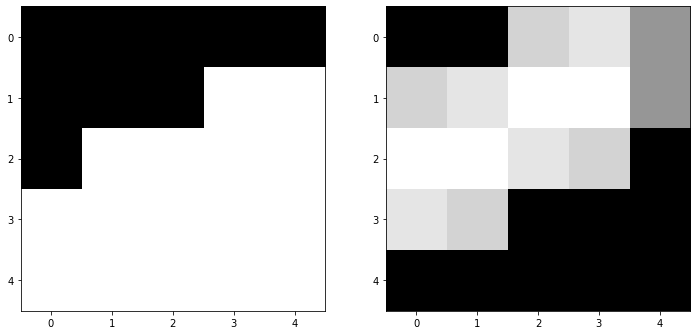

In [37]:
sobel_img, sobel_theta = sobel_filters(img)

plot_images(img, sobel_img.astype(np.uint8))

In [38]:
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi    
    angle[angle < 0] += 180
    
    print(angle)
    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
                #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

[[ 0.    0.   13.65 25.89 90.  ]
 [13.65 25.89 36.1  36.1  90.  ]
 [36.1  36.1  25.89 13.65  0.  ]
 [25.89 13.65  0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.  ]]


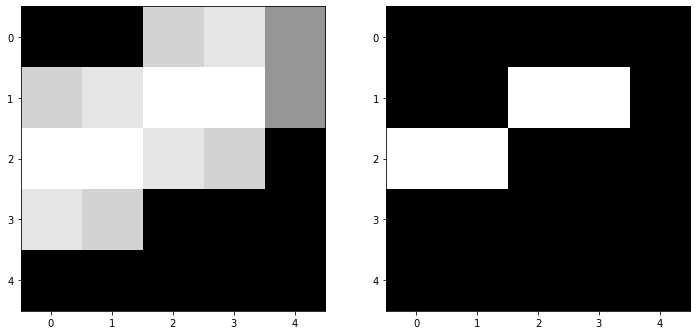

In [62]:
# padded_sobel_img = cv2.copyMakeBorder(sobel_img.astype(np.uint8),1,1,1,1,cv2.BORDER_REFLECT)

nonMaxImg = non_max_suppression(sobel_img, sobel_theta)

plot_images(sobel_img.astype(np.uint8), nonMaxImg)

In [81]:
def threshold(img, lowThresholdRatio=0.3, highThresholdRatio=0.7):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    print(highThreshold, lowThreshold)
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)

178.5 53.55


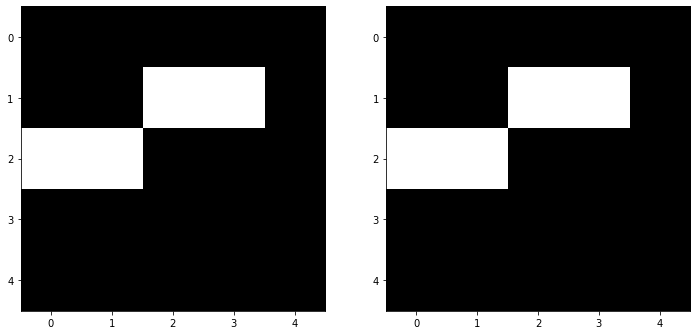

(array([[  0,   0,   0,   0,   0],
        [  0,   0, 255, 255,   0],
        [255, 255,   0,   0,   0],
        [  0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0]], dtype=int32),
 25,
 255)

In [82]:
thresholded_img = threshold(nonMaxImg)


plot_images(nonMaxImg, thresholded_img[0])

thresholded_img

In [83]:
def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    for i in range(0, M):
        for j in range(0, N):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

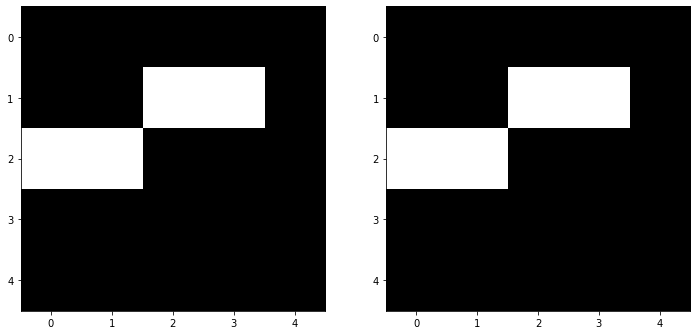

array([[  0,   0,   0,   0,   0],
       [  0,   0, 255, 255,   0],
       [255, 255,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0]], dtype=int32)

In [84]:
final_img = hysteresis(thresholded_img[0], 25)

plot_images(thresholded_img[0], final_img)

final_img

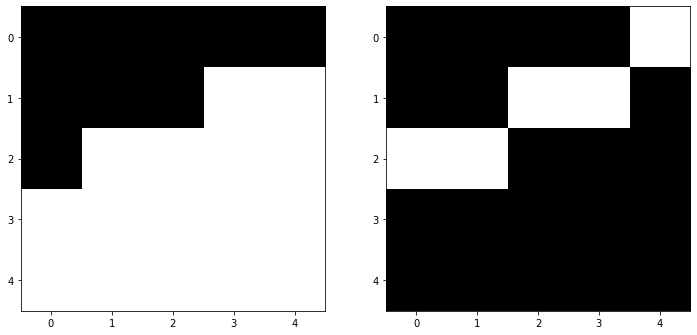

In [211]:
edges = cv2.Canny(img,50,100)

plot_images(img, edges)

In [212]:
edges

array([[  0,   0,   0,   0, 255],
       [  0,   0, 255, 255,   0],
       [255, 255,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0]], dtype=uint8)